In [327]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [328]:
df_16p = pd.read_csv("16P.csv", encoding="macroman")

In [329]:
df_16p

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,59994,0,-1,0,-3,-2,2,1,0,1,...,0,2,0,1,0,0,2,3,3,INFJ
59995,59995,0,0,-2,1,3,0,-3,0,2,...,0,1,0,0,0,0,2,0,-2,ESTP
59996,59996,0,0,1,0,-2,-2,0,0,-1,...,-1,2,0,-3,0,1,-1,0,-1,ISTP
59997,59997,0,0,1,-1,-2,-1,2,0,1,...,0,2,0,2,0,0,0,1,0,ISTJ


In [330]:
df_16p.shape

(59999, 62)

In [331]:
#Dropping unrelevant data 
df_16p.drop("Response Id", 1, inplace=True)


/var/folders/d2/jv0cbnq521d1310vlvclcsm80000gn/T/ipykernel_9475/1673473738.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_16p.drop("Response Id", 1, inplace=True)


In [332]:
df_16p.shape

(59999, 61)

In [333]:
df_16p["Personality"]

0        ENFP
1        ISFP
2        INFJ
3        ISTP
4        ENFJ
         ... 
59994    INFJ
59995    ESTP
59996    ISTP
59997    ISTJ
59998    INFJ
Name: Personality, Length: 59999, dtype: object

In [334]:
df_16p.replace(["ESTJ","ENTJ","ESFJ","ENFJ","ISTJ","ISFJ","INTJ","INFJ","ESTP","ESFP","ENTP","ENFP","ISTP","ISFP","INTP","INFP"],
              [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], inplace=True)


In [335]:
df_16p

,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,Even a small mistake can cause you to doubt your overall abilities and knowledge.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,11
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,13
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,7
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,12
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,0,-1,0,-3,-2,2,1,0,1,0,...,0,2,0,1,0,0,2,3,3,7
59995,0,0,-2,1,3,0,-3,0,2,0,...,0,1,0,0,0,0,2,0,-2,8
59996,0,0,1,0,-2,-2,0,0,-1,0,...,-1,2,0,-3,0,1,-1,0,-1,12
59997,0,0,1,-1,-2,-1,2,0,1,0,...,0,2,0,2,0,0,0,1,0,4


In [336]:
data = df_16p.to_numpy()

In [337]:
target = data[:,60]
arr = target.reshape(59999,1)

In [338]:
predictor = np.delete(data, 60, 1)

In [339]:
#Normalizing data
normalizedData = (predictor-np.min(predictor))/(np.max(predictor)-np.min(predictor))
arr_normalized = np.append(normalizedData, arr, axis=1)

In [340]:
def euclidean_distance(test, train):
    
    x2 = np.sum(test**2, axis=1)
    y2 = np.sum(train**2, axis=1)
    xy = np.matmul(test, train.T)
    x2 = x2.reshape(-1,1)
    distance = (x2 -2*xy + y2)**0.5
    
    return distance


In [341]:
#Finds the most frequent element in an array
def m_frequent(k_list):
        return max(set(list(k_list)), key = list(k_list).count)
    
# gets the nearest k neighbors and returns an array with targets and predictions
def get_neighbors(train, test, num_neighbors):
    dist = euclidean_distance(test[:,0:60], train[:,0:60])
    sorted_dist = dist.argsort()
    
    values = train[:,60][sorted_dist]
    
    nearest_k = values[:,:num_neighbors]
    
    predictions = np.apply_along_axis(m_frequent, 1, nearest_k)
    
    stacked_values = np.column_stack((test[:,60],predictions))
    
    error_in = np.where(stacked_values[:,0]!=stacked_values[:,1])
    
    err_nearest =nearest_k[error_in[0]]
    err_line = stacked_values[error_in[0]]
    
    return stacked_values,err_nearest, err_line


In [342]:
# evaluation metrics for 5 different k values
# uses 5-fold cross validation
# calculates accuracy, precision and recall for 16 different classes
# takes the averages for classes and folds to evaluate the efficency of knn algorithm

def evaluation(data):
    
    df = pd.DataFrame(data) 

    fold1 = df.loc[0:11999]
    fold2 = df.loc[12000:23999]
    fold3 = df.loc[24000:35999]
    fold4 = df.loc[36000:47999]
    fold5 = df.loc[48000:]

    train_val1 = pd.concat([fold1, fold2, fold3, fold4]).to_numpy()
    test_val1 = fold5.to_numpy()

    train_val2 = pd.concat([fold1, fold2, fold3, fold5]).to_numpy()
    test_val2 = fold4.to_numpy()

    train_val3 = pd.concat([fold1, fold2, fold4, fold5]).to_numpy()
    test_val3 = fold3.to_numpy()

    train_val4 = pd.concat([fold1, fold3, fold4, fold5]).to_numpy()
    test_val4 = fold2.to_numpy()

    train_val5 = pd.concat([fold2, fold3, fold4, fold5]).to_numpy()
    test_val5 = fold1.to_numpy()

    train_test = [(train_val1,test_val1),(train_val2,test_val2),(train_val3,test_val3),(train_val4,test_val4),(train_val5,test_val5)]
    

    accuracy_k = []
    precision_k = []
    recall_k = []
    
    for k in range(1,10,2):
        
        fold_accuracy = []
        fold_precision = []
        fold_recall = []

        for train,test in train_test:
            
            frame, err_nearest, err_line = get_neighbors(train,test,k)
            
            # evaluating accuracy, precision, recall
            frame_predictions = pd.DataFrame(frame, columns=["Actual_class","Predicted_class"])
            confusion = pd.crosstab(frame_predictions.Predicted_class, frame_predictions.Actual_class)

            accuracy = []
            precision = []
            recall = []

            for value in range(confusion.shape[0]):
                tp = confusion.iloc[value,value]
                fp = confusion.iloc[value,:].sum()-tp
                fn = confusion.iloc[:,value].sum()-tp
                tn = confusion.sum().sum()-tp-fp-fn
                
                accuracy.append((tp+tn)/confusion.sum().sum())
                precision.append(tp/(tp+fp))
                recall.append(tp/(tp+fn))
                
            fold_accuracy.append(sum(accuracy)/16)
            fold_precision.append(sum(precision)/16)
            fold_recall.append(sum(recall)/16)
    
        accuracy_k.append((sum(fold_accuracy)/5)*100)
        precision_k.append((sum(fold_precision)/5)*100)
        recall_k.append((sum(fold_recall)/5)*100)
        
        print(f"K={k} Finished")
    
        
    return accuracy_k,precision_k,recall_k, err_nearest, err_line


In [343]:
start= time.time()
unscaled_accuracy, unscaled_precision, unscaled_recall, u, u_error = evaluation(data)
end= time.time()
unscaled_time = end-start
print(f"Run time of unscaled data: {unscaled_time}")

K=1 Finished
K=3 Finished
K=5 Finished
K=7 Finished
K=9 Finished
Run time of unscaled data: 2015.7915909290314


In [344]:
start= time.time()
scaled_accuracy, scaled_precision, scaled_recall, n, n_error = evaluation(arr_normalized)
end= time.time()
scaled_time = end-start
print(f"Run time of scaled data: {scaled_time}")

K=1 Finished
K=3 Finished
K=5 Finished
K=7 Finished
K=9 Finished
Run time of scaled data: 1599.6351459026337


# ERROR ANALYSIS FOR CLASSIFICATON

In the below part, you will see macro average statistics and comments on them for this k-NN model, which have been calculated in the "evaluation" function.

In [345]:
#Evaluation Metrics for unscaled data

unsclaed_dict = {"Accurcacy": unscaled_accuracy, "Precision": unscaled_precision, "Recall": unscaled_recall}
unscaled = pd.DataFrame(unsclaed_dict, index=["K=1",
                                              "K=3",
                                              "K=5",
                                              "K=7",
                                              "K=9"])
unscaled

,Accurcacy,Precision,Recall
K=1,99.721870,97.776836,97.773478
K=3,99.854581,98.838072,98.836095
K=5,99.863956,98.913131,98.910962
K=7,99.865831,98.927679,98.926424
K=9,99.866248,98.930925,98.929662


In [346]:
#Evaluation Metrics for Scaled data

sclaed_dict = {"Accurcacy": scaled_accuracy, "Precision": scaled_precision, "Recall": scaled_recall}
scaled = pd.DataFrame(sclaed_dict, index=["K=1",
                                            "K=3",
                                            "K=5",
                                            "K=7",
                                            "K=9"])
scaled

,Accurcacy,Precision,Recall
K=1,99.725829,97.808015,97.805348
K=3,99.854373,98.836611,98.834324
K=5,99.863331,98.908193,98.905816
K=7,99.866248,98.931119,98.929381
K=9,99.867289,98.939314,98.937872


In [347]:
time_dict = {"time": [unscaled_time,scaled_time]}
time = pd.DataFrame(time_dict, index=["unscaled", "scaled"])

time

,time
unscaled,2015.791591
scaled,1599.635146


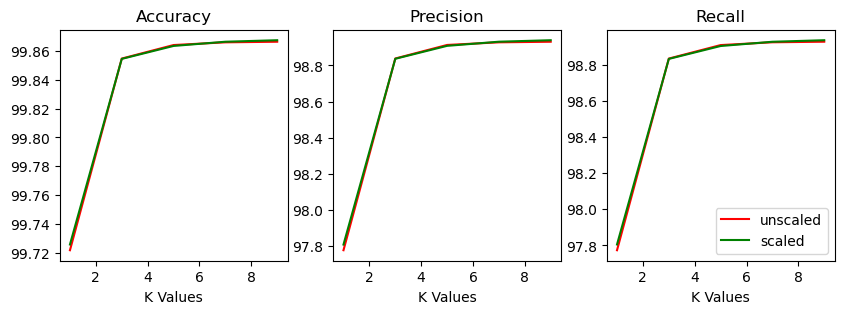

In [348]:
#Accuracy,Precision and Recall for scaled and unscaled data for different K's
#shown as plots

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))

ax1.plot([1,3,5,7,9],unscaled_accuracy, color="r", label="unscaled")
ax1.plot([1,3,5,7,9],scaled_accuracy, color="g", label="scaled")
ax1.set(title="Accuracy", xlabel="K Values")


ax2.plot([1,3,5,7,9],unscaled_precision, color="r", label="unscaled")
ax2.plot([1,3,5,7,9],scaled_precision, color="g", label="scaled")
ax2.set(title="Precision", xlabel="K Values")


ax3.plot([1,3,5,7,9],unscaled_recall, color="r", label="unscaled")
ax3.plot([1,3,5,7,9],scaled_recall, color="g", label="scaled")
ax3.set(title="Recall", xlabel="K Values")

plt.legend()
plt.show()
        

As it can be seen in the graphs, increasing the nearest neighbor number increases the accuracy, precision and recall too however there is a significant amount of increase from k=1 to k=3 since there is no data to compare at k=1.

After k=3, the graphs are settled down, this shows the precision of the k-NN model and calculations since even after you add new neighbors to model it predicts nearly the same classes as before.

Also scaling the data doesn't make any significant difference for this algorithm's accuracy, precision and recall. But it runs faster than the unscaled data.

K-fold increases the accuracy of the algorithm since all data can be used as test also as train. This makes the model more experienced. 

Below, there is an example output with its 9 nearest neighbors, which was actually class13 but k-NN algorithm predicted class12. Working with multiple classes causes this wrong prediction since a person can be near to many other classes.

In [349]:
print(f"Target: {u_error[95][0]} | Prediction: {u_error[95][1]}")
print(f"Nearest neighbors: {u[95]}")

Target: 13 | Prediction: 12
Nearest neighbors: [13 12 12 13 12 12 12 12 13]
